In [87]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [88]:
housing_df = pd.read_csv(r"c:\Users\vamsh\ML_GENAI\MachineLearningandGenerativeAI\MachineLearningandGenerativeAI\MachineLearning\linear_regression\housing.csv")
housing_df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [89]:
housing_df.info() #10 features, 8 numerical and 1 categorical.

# Total rows - 20640
# Total cols - 10 

<class 'pandas.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  str    
dtypes: float64(9), str(1)
memory usage: 1.6 MB


In [90]:
housing_df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


1. Total Rows == count ---> No missing values.
   Missing values in total_bedrooms.
            
2. If mean >> median -> Right Skewed distribution
   If mean << median -> Left skewed distribution
   
   -> Skewed data may need transformation.
   -> Outliers influence linear regression heavily.
   
   EX: total rooms mean is 2635 and median is 2127, Here mean >> median so Right skewed distribution. Max value is 39320 outliers are present. 

   Ex: total_bedrooms, mean >> median, Missing values and outliers exist.

   Even for population, rightly skewed.

   ---> When the difference is minimal, It is considered as strongest predictor.

   **Overall pattern : strongly right skewed. This is typical of socio-economic data.**

3. Standard Deviation - Scale Differences

   **Compare std across columns**

   EX: income: 1, population: 1000
   Large differences mean:
      Feature scaling required.
      Gradient descent may behave poorly without scaling.

   Features with very large std:
      1. These features are highly dispersed.
      2. Likely right skewed.
      3. May contain outliers.

   Based on std alone you should definitely scale features.
   Especially before:
      1. Ridge
      2. Lasso
      3. Polynomial Features
      4. Gradient Descent models.

   4. MIN and MAX - Outlier Detection
     
      Housing Median age - 52

      All houses older than 52yrs old are recorded as 52.

      Linear regression may underestimate effect of age beyond 52.

      Total rooms is a massive outlier.

      1. Multiple Capped variables (age, income, house values)
   
   5. Quartiles spread and IQR

      Ex: Total Rooms

      IQR = Q3 - Q1 = 3148 - 1447.75 = 1700.25

      Upper bound: Q3 + 1.5*IQR = 3148 + 1.5*(1700.25) = 5698

      Max = 39320

      --> Massive outlier
      Rooms are extremly right skewed.
      This will distort Linear Regression.

      -> Total_rooms, total_bedrooms, population, households, median_income

   6. Zero or constant columns, EX: std=0, That column has no information drop it.
   7. Feature Engineering opportunities:
         1. Population very large relative to households -> Maybe create ratio.
         2. Rooms per household -> Better feature than raw rooms





In [91]:
housing_df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

Separate Target and Features

In [92]:
x = housing_df.drop("median_house_value", axis=1)
y = housing_df["median_house_value"]

In [93]:
x.head(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,NEAR BAY


In [94]:
y.head(5)

0    452600.0
1    358500.0
2    352100.0
3    341300.0
4    342200.0
Name: median_house_value, dtype: float64

Feature Engineering

In [95]:
housing_df["rooms_per_household"] = housing_df["total_rooms"]/housing_df["households"]
housing_df["bedrooms_per_room"] = housing_df["total_bedrooms"]/housing_df["total_rooms"]
housing_df["population_per_household"] = housing_df["population"]/housing_df["households"]

In [96]:
housing_df.head(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,6.984127,0.146591,2.555556
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,6.238137,0.155797,2.109842
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,8.288136,0.129516,2.802260
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,5.817352,0.184458,2.547945
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,6.281853,0.172096,2.181467
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY,4.761658,0.231774,2.139896
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY,4.931907,0.192899,2.128405
7,-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.1200,241400.0,NEAR BAY,4.797527,0.221327,1.788253
8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,NEAR BAY,4.294118,0.260274,2.026891
9,-122.25,37.84,52.0,3549.0,707.0,1551.0,714.0,3.6912,261100.0,NEAR BAY,4.970588,0.199211,2.172269


Log Transform for heavily skewed positve variables.

In [97]:
for col in ["total_rooms", "total_bedrooms", "population", "households", "median_income"]:
    housing_df[col] = np.log1p(housing_df[col])

In [98]:
housing_df.head(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household
0,-122.23,37.88,41.0,6.781058,4.867534,5.777652,4.844187,2.232720,452600.0,NEAR BAY,6.984127,0.146591,2.555556
1,-122.22,37.86,21.0,8.867850,7.009409,7.784057,7.037906,2.230165,358500.0,NEAR BAY,6.238137,0.155797,2.109842
2,-122.24,37.85,52.0,7.291656,5.252273,6.208590,5.181784,2.111110,352100.0,NEAR BAY,8.288136,0.129516,2.802260
3,-122.25,37.85,52.0,7.150701,5.463832,6.326149,5.393628,1.893579,341300.0,NEAR BAY,5.817352,0.184458,2.547945
4,-122.25,37.85,52.0,7.395108,5.638355,6.338594,5.560682,1.578195,342200.0,NEAR BAY,6.281853,0.172096,2.181467
5,-122.25,37.85,52.0,6.824374,5.365976,6.025866,5.267858,1.616771,269700.0,NEAR BAY,4.761658,0.231774,2.139896
6,-122.25,37.84,52.0,7.838343,6.194405,6.998510,6.244167,1.538822,299200.0,NEAR BAY,4.931907,0.192899,2.128405
7,-122.25,37.84,52.0,8.040769,6.533789,7.054450,6.473891,1.415853,241400.0,NEAR BAY,4.797527,0.221327,1.788253
8,-122.26,37.84,42.0,7.846199,6.501290,7.095893,6.390241,1.125059,226700.0,NEAR BAY,4.294118,0.260274,2.026891
9,-122.25,37.84,52.0,8.174703,6.562444,7.347300,6.572283,1.545688,261100.0,NEAR BAY,4.970588,0.199211,2.172269


In [99]:
housing_df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,rooms_per_household,bedrooms_per_room,population_per_household
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000
mean,-119.569704,35.631861,28.639486,7.629377,6.054708,7.025503,5.984702,1.516995,206855.816909,5.429000,0.213039,3.070655
std,2.003532,2.135952,12.585558,0.749991,0.726728,0.736238,0.726740,0.358677,115395.615874,2.474173,0.057983,10.386050
min,-124.350000,32.540000,1.000000,1.098612,0.693147,1.386294,0.693147,0.405398,14999.000000,0.846154,0.100000,0.692308
25%,-121.800000,33.930000,18.000000,7.278456,5.693732,6.669498,5.638355,1.270715,119600.000000,4.440716,0.175427,2.429741
50%,-118.490000,34.260000,29.000000,7.662938,6.077642,7.062192,6.016157,1.511781,179700.000000,5.229129,0.203162,2.818116
75%,-118.010000,37.710000,37.000000,8.054840,6.473891,7.453562,6.406880,1.748025,264725.000000,6.052381,0.239821,3.282261
max,-114.310000,41.950000,52.000000,10.579514,8.771215,10.482430,8.713253,2.772595,500001.000000,141.909091,1.000000,1243.333333


Handle Missing Values

In [100]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="median")
housing_df["total_bedrooms"] = imputer.fit_transform(housing_df[["total_bedrooms"]])

housing_df["bedrooms_per_room"] = imputer.fit_transform(housing_df[["bedrooms_per_room"]])

housing_df.head(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household
0,-122.23,37.88,41.0,6.781058,4.867534,5.777652,4.844187,2.232720,452600.0,NEAR BAY,6.984127,0.146591,2.555556
1,-122.22,37.86,21.0,8.867850,7.009409,7.784057,7.037906,2.230165,358500.0,NEAR BAY,6.238137,0.155797,2.109842
2,-122.24,37.85,52.0,7.291656,5.252273,6.208590,5.181784,2.111110,352100.0,NEAR BAY,8.288136,0.129516,2.802260
3,-122.25,37.85,52.0,7.150701,5.463832,6.326149,5.393628,1.893579,341300.0,NEAR BAY,5.817352,0.184458,2.547945
4,-122.25,37.85,52.0,7.395108,5.638355,6.338594,5.560682,1.578195,342200.0,NEAR BAY,6.281853,0.172096,2.181467
5,-122.25,37.85,52.0,6.824374,5.365976,6.025866,5.267858,1.616771,269700.0,NEAR BAY,4.761658,0.231774,2.139896
6,-122.25,37.84,52.0,7.838343,6.194405,6.998510,6.244167,1.538822,299200.0,NEAR BAY,4.931907,0.192899,2.128405
7,-122.25,37.84,52.0,8.040769,6.533789,7.054450,6.473891,1.415853,241400.0,NEAR BAY,4.797527,0.221327,1.788253
8,-122.26,37.84,42.0,7.846199,6.501290,7.095893,6.390241,1.125059,226700.0,NEAR BAY,4.294118,0.260274,2.026891
9,-122.25,37.84,52.0,8.174703,6.562444,7.347300,6.572283,1.545688,261100.0,NEAR BAY,4.970588,0.199211,2.172269


In [101]:
housing_df.isnull().sum()

longitude                   0
latitude                    0
housing_median_age          0
total_rooms                 0
total_bedrooms              0
population                  0
households                  0
median_income               0
median_house_value          0
ocean_proximity             0
rooms_per_household         0
bedrooms_per_room           0
population_per_household    0
dtype: int64

Handle Categorical Column

In [102]:
housing_df = pd.get_dummies(housing_df, columns=["ocean_proximity"], drop_first=True)

In [103]:
housing_df.head(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,rooms_per_household,bedrooms_per_room,population_per_household,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,41.0,6.781058,4.867534,5.777652,4.844187,2.232720,452600.0,6.984127,0.146591,2.555556,False,False,True,False
1,-122.22,37.86,21.0,8.867850,7.009409,7.784057,7.037906,2.230165,358500.0,6.238137,0.155797,2.109842,False,False,True,False
2,-122.24,37.85,52.0,7.291656,5.252273,6.208590,5.181784,2.111110,352100.0,8.288136,0.129516,2.802260,False,False,True,False
3,-122.25,37.85,52.0,7.150701,5.463832,6.326149,5.393628,1.893579,341300.0,5.817352,0.184458,2.547945,False,False,True,False
4,-122.25,37.85,52.0,7.395108,5.638355,6.338594,5.560682,1.578195,342200.0,6.281853,0.172096,2.181467,False,False,True,False


In [104]:
corr_matrix = housing_df.corr(numeric_only=True)
corr_with_target = corr_matrix["median_house_value"].sort_values(ascending=False)

print(corr_with_target)

median_house_value            1.000000
median_income                 0.669914
ocean_proximity_NEAR BAY      0.160284
total_rooms                   0.159422
rooms_per_household           0.151948
ocean_proximity_NEAR OCEAN    0.141862
housing_median_age            0.105623
households                    0.073612
total_bedrooms                0.053059
ocean_proximity_ISLAND        0.023416
population                   -0.021205
population_per_household     -0.023737
longitude                    -0.045967
latitude                     -0.144160
bedrooms_per_room            -0.254632
ocean_proximity_INLAND       -0.484859
Name: median_house_value, dtype: float64


Drop  total_rooms, households, total_bedrooms, population_per_household,, Before we drop lets analyse. 

Model Splitting

In [105]:
from sklearn.model_selection import train_test_split

x = housing_df.drop("median_house_value", axis=1)
y = housing_df["median_house_value"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

Feature Scaling

In [106]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [107]:
model = LinearRegression()
model.fit(x_train_scaled, y_train)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


Evaluate

In [108]:

y_pred = model.predict(x_test_scaled)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("RMSE", rmse)
print("R2", r2)

RMSE 72544.36366745223
R2 0.5983937238448854


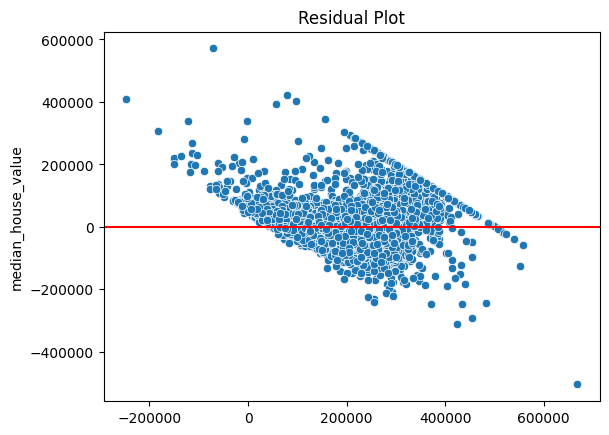

In [109]:

residuals = y_test - y_pred
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(0, color="red")
plt.title("Residual Plot")
plt.show()


In [110]:
from sklearn.linear_model import Ridge

ridge = Ridge(alpha=1.0)
ridge.fit(x_train_scaled, y_train)

ridge_pred = ridge.predict(x_test_scaled)
print("Ridge R2:", r2_score(y_test, ridge_pred))


Ridge R2: 0.6006503292276282


In [111]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=0.01)
lasso.fit(x_train_scaled, y_train)

lasso_pred = lasso.predict(x_test_scaled)
print("Lasso R2:", r2_score(y_test, lasso_pred))


Lasso R2: 0.5990742454572076


c:\Users\vamsh\ML_GENAI\MachineLearningandGenerativeAI\MachineLearningandGenerativeAI\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:716: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.782e+13, tolerance: 2.207e+10
  model = cd_fast.enet_coordinate_descent(


In [112]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

y_pred = model.predict(x_test_scaled)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("RMSE:", rmse)
print("MAE:", mae)
print("R2:", r2)


RMSE: 72544.36366745223
MAE: 53313.7869640234
R2: 0.5983937238448854


Lets Drop columns

In [113]:
#Drop  total_rooms, households, total_bedrooms, population_per_household,, Before we drop lets analyse. 

from sklearn.model_selection import train_test_split

x = housing_df.drop(["median_house_value", "total_rooms", "households", "total_bedrooms", "population_per_household"],  axis=1)
y = housing_df["median_house_value"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [114]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

model = LinearRegression()
model.fit(x_train_scaled, y_train)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [115]:
y_pred = model.predict(x_test_scaled)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("RMSE", rmse)
print("R2", r2)

RMSE 73980.94743543897
R2 0.5823303507281817


In [120]:
from sklearn.linear_model import Ridge

ridge = Ridge(alpha=35, max_iter=100, tol=0.1)
ridge.fit(x_train_scaled, y_train)

ridge_pred = ridge.predict(x_test_scaled)
print("Ridge R2:", r2_score(y_test, ridge_pred))

Ridge R2: 0.5826246245883842


In [121]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=50)
lasso.fit(x_train_scaled, y_train)

lasso_pred = lasso.predict(x_test_scaled)
print("Lasso R2:", r2_score(y_test, lasso_pred))

Lasso R2: 0.582507365616083


Model performed better without dropping columns